# Ford GoBike System Data Analysis.
## by : Assem Salama

## Preliminary Wrangling

- This dataset provides a group of information about rides in company called Ford GoBike which do their activities around San Francisco Bay Area.

- The company business model based on renting bikes , for instance you can take a bike from one of the stations which are Prevalent throughout the whole city then give it back after finishing your ride somewhere else within the city's stations.

- When it comes to payment they have a several options for clients like , annual subscription ,purchasing 3 days or 1 day (24 hours).
***
### Variables Orientation : source[ https://www.bikeshareforall.org/ride/]
1. `duration_sec` : The duration of the ride in seconds.
2. `start_time` : The time and date of the beginning of the ride.
3. `end_time`  : The time and date of the end of the ride.
4. `start_station_id` : The station's id that the person took the bike from.
5. `start_station_name` : The station's name that the person took the bike from.
6. `start_station_latitude` : One of the station's dimensions called latitude that the person took the bike from.
7. `start_station_longitude` : One of the station's dimensions called longitude that the person took the bike from.
8. `end_station_id` : The station's id that the person returned the bike to.
9. `end_station_name` : The station's name that the person returned the bike to.
10. `end_station_latitude` : One of the station's dimensions called latitude that the person returned the bike to.
11. `end_station_longitude` : One of the station's dimensions called longitude that the person returned the bike to.
12. `bike_id `: The id of the bike itself.
14. `user_type` : The status of the clients whether they are Subscriber or Casual customer.
15. `member_birth_year` : The client's year of birth.
16. `member_gender` : The client's gender.
17. `bike_share_for_all_trip`: Ford GoBike's "Bike Share For All" program currently provides a one-time $5 annual membership for qualifying Bay Area residents. The program also includes a cash payment option for those who do not have a debit or credit card.
***

## This Report is trying to answer:
- When are most trips taken in terms of time of day, day of the week?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd 
import numpy as np
import requests
import re
import json
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sb
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


sb.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# 1. Gathering

### downloading the raw data files.

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# 2. Assessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
sum(df.duplicated())

0

In [6]:
print(df.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

# Assessment summary.

## Quality issues:
- `start_time` type is object instead of **Datetime**.
- `end_time` type is object instead of **Datetime**.
- `start_station_id` type is float instead of **object** where it's a nominal variable.
- `end_station_id` type is float instead of **object** where it's a nominal variable.
- `bike_id` type is int instead of **object** where it's a nominal variable.
- `member_birth_year` type is float instead of **int**
## Tidiness Issues:
- `member_birth_year` There are an outliers values that maybe lead to make the analysis less precise.
- `start_station_id ` ,`start_station_latitude`,`start_station_longitude`,`end_station_id`,`end_station_latitude`and`end_station_longitude` are not that much usful in my analysis perspectives & I think they are beyond the scope of our analysis questions.
- There are a `NAN` values in our dataset.
- It's going to be more descriptive if we if we create a column that measures ride's duration in minutes.

## 3. Cleaning
### First, we need to take a copies for our datasets


### Before doing any exploration there are some issues have to be solved first :
1. There are inappropriate `data type` for some variables.
2. Threre are some records with `NAN` we have to drop it.
"""df = df.dropna()   df = df.reset_index(drop=True)"""

3. There are some outliers in `member_birth_year` where the min value 1878 which means 141 years old.
4. There are some variables I think they are beyond the scope of our analysis questions, so I will drop them.

In [7]:
# first of all , get a copy from the original dataset to make all the adjustments on it.
bike_share = df.copy()
bike_share.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Define
- There are a NAN values in our dataset.
### Solution
- drop the records with NAN values using `dropna()` function.
### Code:

In [8]:
bike_share = bike_share.dropna()
bike_share = bike_share.reset_index(drop=True)

In [9]:
# check
bike_share.shape

(174952, 16)

### Define
- `start_time` type is object instead of **Datetime**.
- `end_time` type is object instead of **Datetime**.
- `start_station_id` type is float instead of **object** where it's a nominal variable.
- `end_station_id` type is float instead of **object** where it's a nominal variable.
- `bike_id` type is int instead of **object** where it's a nominal variable.
- `member_birth_year` type is float instead of **int**

### Solution
- convert all of these inappropriate data types to the correct ones using `astype()` function
### Code:

In [10]:
bike_share['start_time'] = bike_share['start_time'].astype(object)
bike_share['start_station_id'] = bike_share['start_station_id'].astype(object)
bike_share['end_station_id'] = bike_share['end_station_id'].astype(object)
bike_share['bike_id'] = bike_share['bike_id'].astype(object)

bike_share['start_time'] = pd.to_datetime(bike_share['start_time'])
bike_share['end_time'] = pd.to_datetime(bike_share['end_time'])

bike_share['member_birth_year'] = bike_share['member_birth_year'].astype(int)

In [11]:
# check
print(bike_share.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object


### Define
- `start_station_id ` ,`start_station_latitude`,`start_station_longitude`,`end_station_id`,`end_station_latitude`and`end_station_longitude` are not that much usful in my analysis perspectives & I think they are beyond the scope of our analysis questions.
### Solution
- drop these columns using `drop()` function.
### Code:

In [12]:
useless_columns= ['start_station_id' ,'start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude']
bike_share.drop(columns= useless_columns, inplace=True)

In [13]:
# check
bike_share.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No


### Define
- `member_birth_year` There are an outliers values that maybe lead to make the analysis less precise.
### Solution
- create column called `client_age` and create a box plot.
- Then, indicate our age limit based on the box plot. 
- finally remove these records and drop `member_birth_year` column.
### Code:

In [14]:
bike_share['client_age'] = 2019 - bike_share['member_birth_year']

Text(0.5, 1.0, 'Clients age distribution')

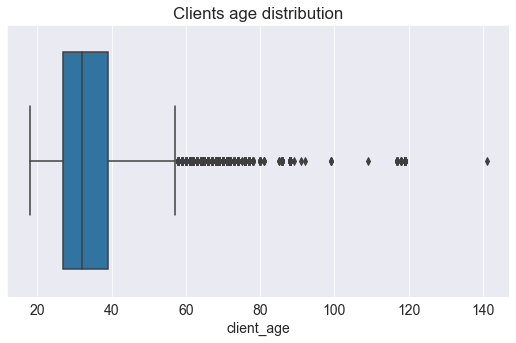

In [15]:
sb.boxplot(data=bike_share, x='client_age');
plt.title('Clients age distribution')

- This box plot indicates that our age limit is about 60 years old and what is higher than that is outliers. 

In [16]:
outliers_index= bike_share[bike_share['client_age'] > 60].index 
# drop these row indexes.
bike_share.drop(outliers_index, inplace = True) 
# drop member_birth_year column
bike_share.drop(columns= ['member_birth_year'], inplace=True)

# check
bike_share.shape

(171422, 10)

### Define
- It's going to be more descriptive if we if we create a column that measures ride's duration in minutes.
### Solution
- Divide the `duration_sec` column by 60, creating a new coulmn `duration_min` as int,then drop the old column.
### Code:

In [17]:
bike_share['duration_mins'] = bike_share['duration_sec'] / 60
bike_share['duration_mins'] = bike_share['duration_mins'].astype(int)

bike_share.drop(columns= ['duration_sec'], inplace=True)

In [18]:
#check
bike_share.head(1)

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,client_age,duration_mins
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,35,869


# In order to answer the above question we need to exctract alot of features from `start_time`  & `end_time` columns:

In [19]:
# I'll use (.dt.date) to access the values of the series as datetimelike and return several properties.

bike_share['start_time_date']=bike_share['start_time'].dt.date
bike_share['end_time_date']=bike_share['end_time'].dt.date

In [20]:
# get the year & month in start_time_date & end_time_date.

bike_share['start_time_year_month']=bike_share['start_time'].map(lambda x: x.strftime('%Y-%m'))
bike_share['end_time_year_month']=bike_share['end_time'].map(lambda x: x.strftime('%Y-%m'))

In [21]:
# get the year(without 20) & month in start_time_date.

bike_share['start_time_year_month_renamed'] = bike_share['start_time'].dt.strftime('%y' + '-' + '%m')

In [22]:
# get the month in start_time_date & end_time_date.

bike_share['start_time_month']=bike_share['start_time'].dt.month.astype(int)
bike_share['end_time_month']=bike_share['end_time'].dt.month.astype(int)

In [23]:
# get the hour & minute in start_time_date & end_time_date.

bike_share['start_time_hour_minute']=bike_share['start_time'].map(lambda x: x.strftime('%H-%m'))
bike_share['end_time_hour_minute']=bike_share['end_time'].map(lambda x: x.strftime('%H-%m'))

In [24]:
# get the hour in start_time_date & end_time_date.

bike_share['start_time_hour']=bike_share['start_time'].dt.hour
bike_share['end_time_hour']=bike_share['end_time'].dt.hour

In [25]:
# get the weekday in start_time_date & end_time_date.

bike_share['start_time_weekday']=bike_share['start_time'].dt.day_name()
bike_share['end_time_weekday']=bike_share['end_time'].dt.day_name()

In [26]:
bike_share.columns

Index(['start_time', 'end_time', 'start_station_name', 'end_station_name',
       'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip',
       'client_age', 'duration_mins', 'start_time_date', 'end_time_date',
       'start_time_year_month', 'end_time_year_month',
       'start_time_year_month_renamed', 'start_time_month', 'end_time_month',
       'start_time_hour_minute', 'end_time_hour_minute', 'start_time_hour',
       'end_time_hour', 'start_time_weekday', 'end_time_weekday'],
      dtype='object')

- Before moving on to the next section I need to drop some columns probably I'll not use.

In [27]:
# Drop in action.
columns= ['start_time_year_month' ,'end_time_year_month','start_time_year_month_renamed','start_time_hour_minute','end_time_hour_minute']
bike_share.drop(columns= columns, inplace=True)

In [28]:
# check.
bike_share.head(1)

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,client_age,duration_mins,start_time_date,end_time_date,start_time_month,end_time_month,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,35,869,2019-02-28,2019-03-01,2,3,17,8,Thursday,Friday


### What is the structure of your dataset?

- (171422, 18)

### What is/are the main feature(s) of interest in your dataset?

- `trip Duration` and `Number of rides`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Features like `user_type` , `member_gender` , `client_age`, `start_time_hour` & `start_time_weekday` are going to help me to investigate the relationship between them my features of interest.

> ## Univariate Exploration

<span style="color:red"> I'll start by looking at the distribution of the main variable of interest: Durarion minutes.

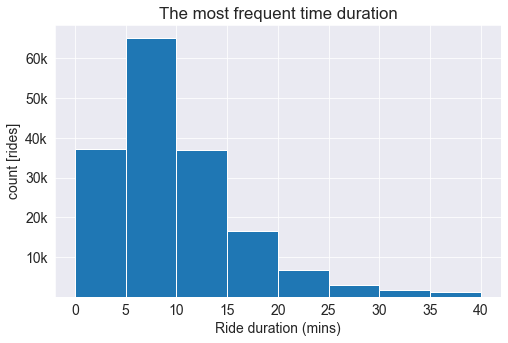

In [29]:
# start with a standard-scaled plot
binsize = 5
bins = np.arange(0,40+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_share, x = 'duration_mins', bins = bins)
plt.xlabel('Ride duration (mins)')
plt.ylabel('count [rides]')
plt.title('The most frequent time duration')
plt.yticks([10000,20000,30000,40000,50000,60000],['10k','20k','30k','40k','50k','60k'])
plt.show()

<span style="color:navy"> We can see here from the figure that the most frequent ride duration among all trips is between 5 to 10 mins. while there are two equal groups of individuals prefer to have the bike for a 5 mins or from 10 to 15 mins.
    
<span style="color:navy">Does being subscriber or customer affect the time you spend?
    
<span style="color:navy">What we'll know next is in which gender people use the bikes for longer time?. To dicover whether there is a relationship between the gender and the amount of time consumed in biking. 

 <span style="color:red"> Let's look at the gender distribution to know which gender is more and by which percentage.

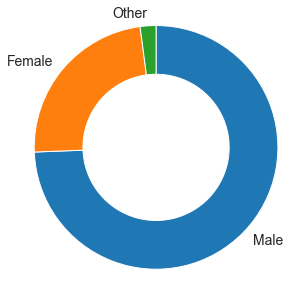

In [30]:
# create a simple plot.
sorted_counts = bike_share['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

In [31]:
# first we gonna create a dataframe holds each gender and the count associated with under `bike_id` column.
gender_df = bike_share.groupby('member_gender').agg({'bike_id':'count'})
gender_df

,bike_id
member_gender,
Female,40305
Male,127520
Other,3597


In [32]:
# then, create a column that hold the percentage of each gender.
gender_df['percentage'] = (gender_df['bike_id']/gender_df['bike_id'].sum())*100
gender_df

,bike_id,percentage
member_gender,,
Female,40305,23.512151
Male,127520,74.389518
Other,3597,2.098330


(0.0, 100.0)

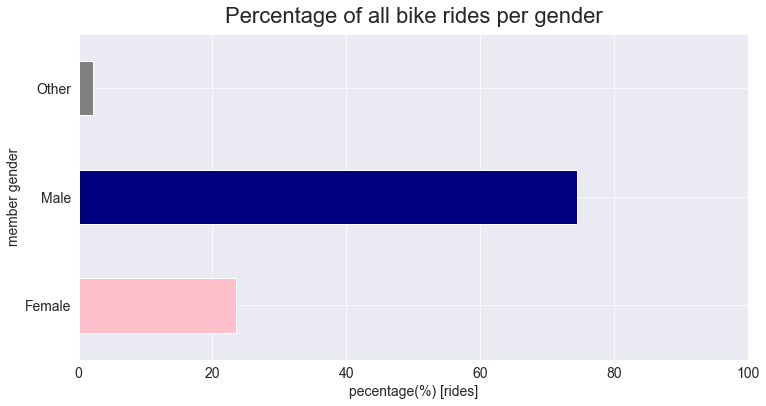

In [33]:
# plot
colors = ['pink', 'navy', 'gray']
gender_df['percentage'].plot(kind='barh', color=colors, figsize=(12,6))
plt.title('Percentage of all bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('member gender')
plt.xlabel('pecentage(%) [rides]')
plt.xlim(0,100)

<span style="color:navy">Males are dominent in our data by about 3 quarters of it while Females is about 25%  &  2% is other.

 <span style="color:red"> let's now look at the distribution of our clients age.

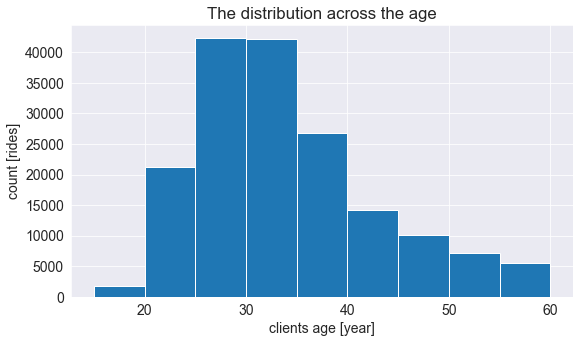

In [34]:
# create a simple plot
bins = np.arange(15, bike_share['client_age'].max()+5, 5)
plt.hist(data = bike_share, x = 'client_age' , bins=bins);
plt.xlabel('clients age [year]')
plt.ylabel('count [rides]')
plt.title('The distribution across the age');

In [35]:
# It will be so useful if we create a segmentation for our clients' age from a teenager to an old man.
bike_share['member_age_segment'] = bike_share['client_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                                      else '20 - 30' if 20<x<=30
                                                                      else '30 - 40' if 30<x<=40
                                                                      else '40 - 50' if 40<x<=50
                                                                      else '50 - 60' if 50<x<=60
                                                                      else x)

In [36]:
# As we did before, we gonna create a dataframe holds each age segment and the count associated with under `bike_id` column.
age_df = bike_share.groupby('member_age_segment').agg({'bike_id':'count'})

In [37]:
# get the percentage of each.
age_df['percentage'] = (age_df['bike_id']/age_df['bike_id'].sum())*100
age_df

,bike_id,percentage
member_age_segment,,
10 - 20,4213,2.457678
20 - 30,70054,40.866400
30 - 40,63808,37.222760
40 - 50,22024,12.847826
50 - 60,11323,6.605337


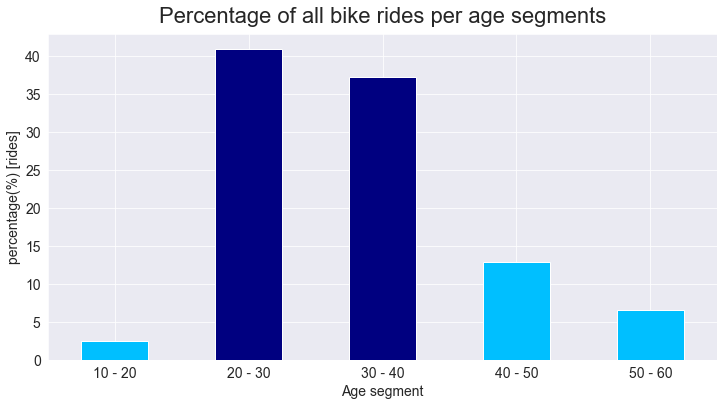

In [38]:
# plot
colors = ['deepskyblue', 'navy', 'navy','deepskyblue','deepskyblue']
age_df['percentage'].plot(kind='bar', color=colors, figsize=(12,6))
plt.title('Percentage of all bike rides per age segments', fontsize=22, y=1.015)
plt.ylabel('percentage(%) [rides]')
plt.xticks(rotation=360)
plt.xlabel('Age segment');

<span style="color:navy">More than 40% of rides has been done by individuals their age is between 20 to 30 years and in the second place of rides percentage the age segment of 30-40 comes with slight difference.

<span style="color:red"> let's answer our first question listed above : 
## When are most trips taken in terms of `time of day`, `day of the week`?

### 1st `time of day`

In [39]:
# first of all, create  a dataframe that holds each star time hour and the count associated with under `bike_id` column.
hour_df = bike_share.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()

In [40]:
# Then create a percentage column that holds the percentage compared to the sum of all rides.
hour_df['percentage'] = (hour_df['bike_id']/hour_df['bike_id'].sum())*100

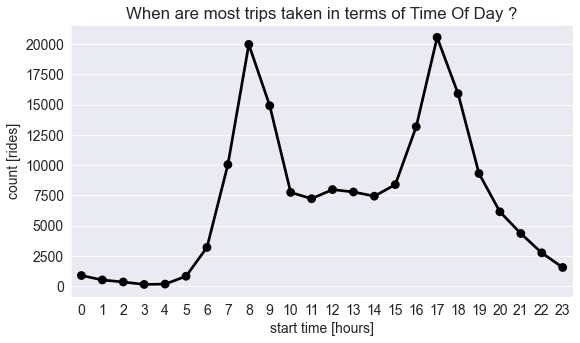

In [41]:
# count plot.
base_color = 'black'
sb.pointplot(data=hour_df, x='start_time_hour', y='bike_id', color=base_color, ci='sd')
plt.title('When are most trips taken in terms of Time Of Day ?')
plt.xlabel('start time [hours]')
plt.ylabel('count [rides]');

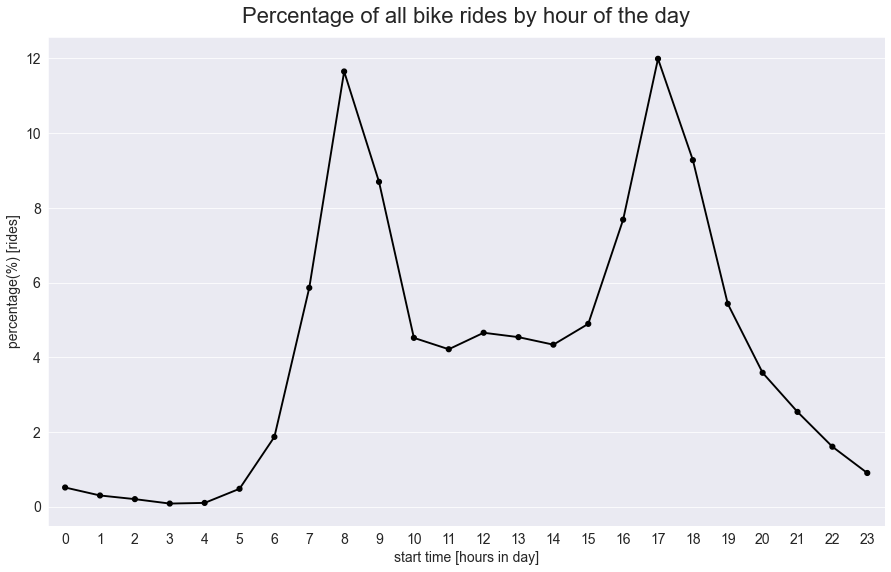

In [42]:
# percentage plot.
plt.figure(figsize=(15,9))
sb.pointplot(data=hour_df,x='start_time_hour', y='percentage', scale=.7, color='black')
plt.title('Percentage of all bike rides by hour of the day', fontsize=22, y=1.015)
plt.xlabel('start time [hours in day]')
plt.ylabel('percentage(%) [rides]');

<span style="color:navy">According to the figure above there are 2 spikes have been occuring in terms of biking use the first one is at 8 am and it remains steady untill it go for the second spike at 5 pm.

### 2nd `day of the week`.

In [43]:
# creating  a dataframe that holds each weekday and the count associated with under `bike_id` column.
weekday_df = bike_share.groupby('start_time_weekday').agg({'bike_id':'count'}).reset_index()
weekday_df

,start_time_weekday,bike_id
0,Friday,27089
1,Monday,25115
2,Saturday,14114
3,Sunday,14174
4,Thursday,33051
5,Tuesday,30016
6,Wednesday,27863


In [44]:
# Then adding a percentage column that holds the percentage compared to the sum of all rides.
weekday_df['percentage'] = (weekday_df['bike_id']/weekday_df['bike_id'].sum())*100

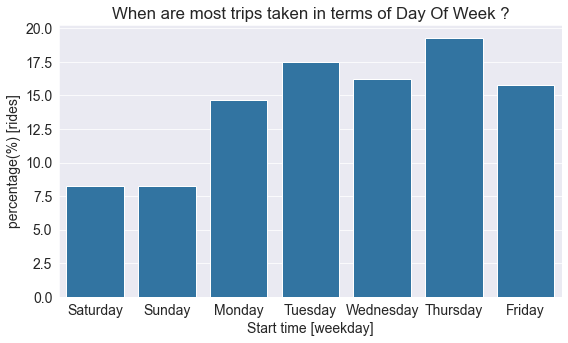

In [45]:
# plot
# add my desired weekday index.
weekday_index = ['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
base_color = sb.color_palette()[0]
sb.barplot(data=weekday_df, x='start_time_weekday', y='percentage', color=base_color , order=weekday_index)
plt.xlabel('Start time [weekday]')
plt.title('When are most trips taken in terms of Day Of Week ?')
plt.ylabel('percentage(%) [rides]');

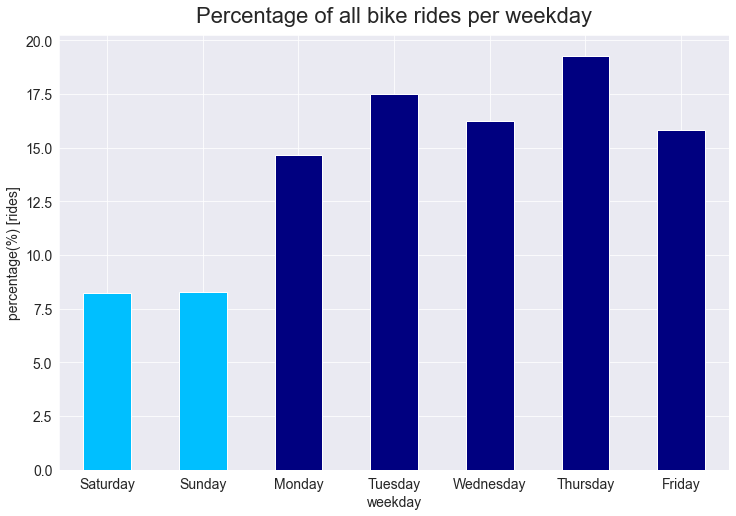

In [46]:
# Do a little adjustment to magnify the message I want to convey
weekday_df_2 = bike_share.groupby('start_time_weekday').agg({'bike_id':'count'})
weekday_df_2['percentage'] = (weekday_df_2['bike_id']/weekday_df_2['bike_id'].sum())*100

weekday_index = ['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
colors = ['deepskyblue', 'deepskyblue', 'navy', 'navy', 'navy', 'navy', 'navy']

weekday_df_2.reindex(weekday_index)['percentage'].plot(kind='bar', color=colors, figsize=(12,8), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday')
plt.ylabel('percentage(%) [rides]')
plt.xticks(rotation=360);

# weekday_df : the index column is numbers from 0 :6
# weekday_df_2: the index column is the weekdays itself , which helps me in `reindex()` function.

<span style="color:navy"> Now, it's way too clear that the use of biking is increasing aligned with the weekdays and gets down at weekends. Additionally, Thursday is the one that gets the heighest percentage in terms of biking use with a slight differnces among the another workdays.

- The most frequent duration for riding a bike is from 5 to 10 mins
***
- Males use bikes more than Females.
- Age from 20 to 40 years old is the segment that uses bikes the most.
- The rush hours for bike-share are 8 AM and 5 PM.
- There is a positive correlation between increasing the use of bikes and being in workdays of the week.
***
This data required wrangling work to make it suitable enough dor analysis. what I did was extracting some variables (using `regex`) from the main variables in the original data to help me in my analysis point of view.

### What we are going to do next?
- we'll investigate more if being subscriber or normal customer affects the trip duration you spend and what is the average time for each.
- Does being in `bike share for all trip` affects your duration trip or not?

> ## Bivariate Exploration.

In [47]:
user_type = bike_share.groupby('user_type').size().reset_index(name='count')
user_type['percentage']=user_type['count']/len(bike_share)*100
user_type

,user_type,count,percentage
0,Customer,16372,9.550699
1,Subscriber,155050,90.449301


<span style="color:navy"> 90% of the rides was conducted by Subscriber and almost 10% was by Casual customer. 

### What is the `average trip duration` for each `User Status`?

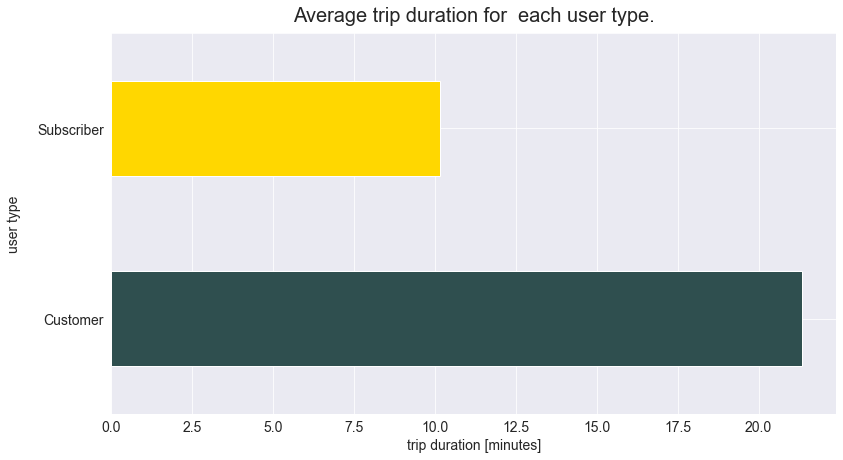

In [48]:
colors=['darkslategray', 'gold']
ax = bike_share.groupby('user_type')['duration_mins'].mean().plot(kind='barh', color=colors, figsize=(13,7))
ax.set_title('Average trip duration for  each user type.', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('trip duration [minutes]');

<span style="color:navy"> As we can see here the average trip duration for Casual customers is more than those who had a subscription by about double the period.Thus,that may bring the idea that subscribers is using bikes for going to particular places like work or somethig like that that dont take a lot of time.

### What is the `average trip duration` for each `GENDER`?

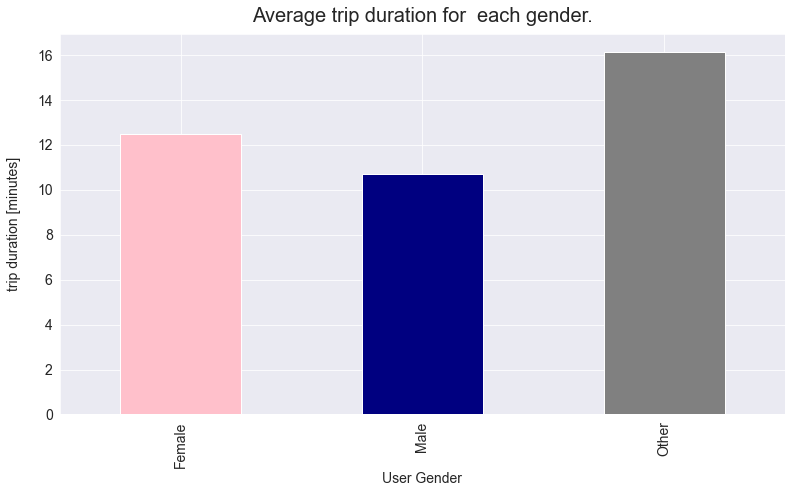

In [49]:
colors=['pink', 'navy','gray']
ax = bike_share.groupby('member_gender')['duration_mins'].mean().plot(kind='bar', color=colors, figsize=(13,7))
ax.set_title('Average trip duration for  each gender.', fontsize=20, y=1.015)
ax.set_ylabel('trip duration [minutes]', labelpad=16)
ax.set_xlabel('User Gender');

<span style="color:navy"> The average amount of time spent for biking for men is slightly less than those for women. Previously, we knew that almost 75% of our data are men, which indicates that men is more determined with the period they'll spend in biking.

### What is the `average trip duration` for each `Age Segment`?

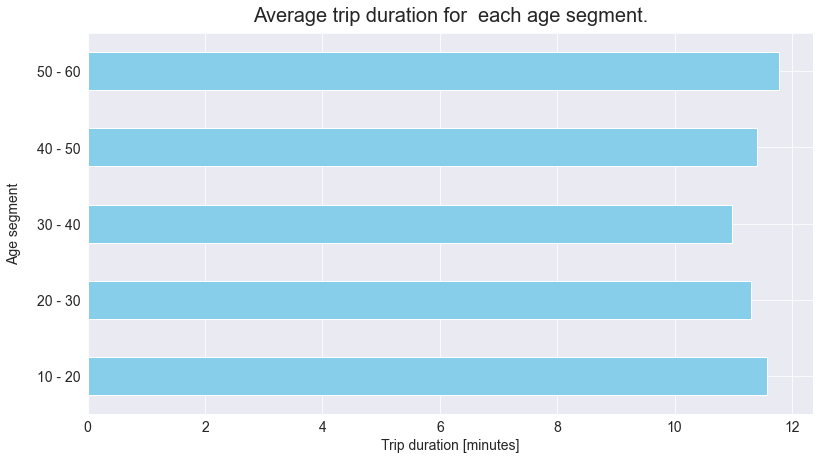

In [50]:
colors=['skyblue']
ax = bike_share.groupby('member_age_segment')['duration_mins'].mean().plot(kind='barh', color=colors, figsize=(13,7))
ax.set_title('Average trip duration for  each age segment.', fontsize=20, y=1.015)
ax.set_ylabel('Age segment', labelpad=16)
ax.set_xlabel('Trip duration [minutes]');

<span style="color:navy"> There is no significant difference or even fluctuations in average rides durations across all different age segments.

In [51]:
# why not we don't do a function to avoid all this code repetition.
def horizontal_bar_for_average_trip_duration(x):
    """this function to provide horizontal bar chart for the distribution of the average duration_mins column with
       any other categorical variable.
       color of bars : blue
       parameter x:  is the categorical variable name between " " quotation marks.
    """
    colors=sb.color_palette()[0]
    ax = bike_share.groupby(x)['duration_mins'].mean().plot(kind='barh', color=colors, figsize=(13,7))
    ax.set_title(x +' '+'Distribution', fontsize=20, y=1.015)
    ax.set_ylabel(x, labelpad=16)
    ax.set_xlabel('Trip duration [minutes]');

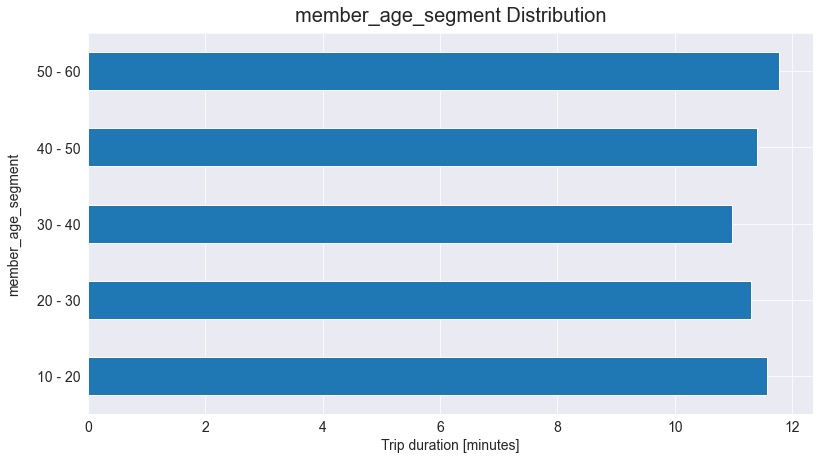

In [52]:
horizontal_bar_for_average_trip_duration(x='member_age_segment')

### What is the `average ride duration` for each `Weekday`?

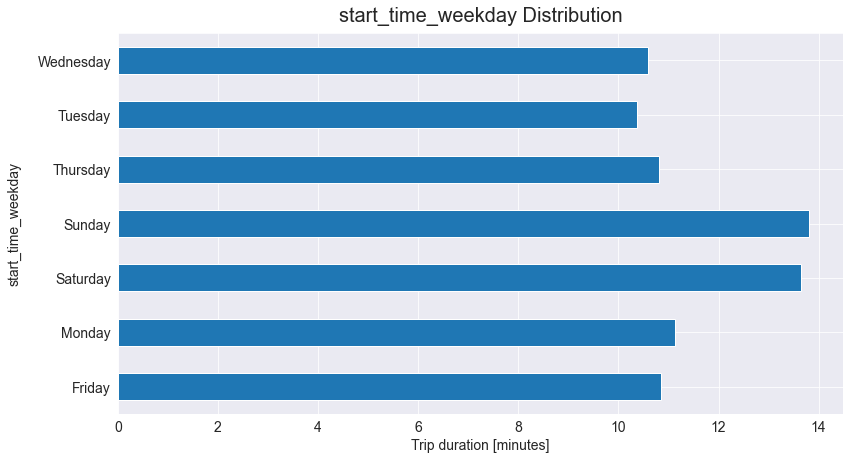

In [53]:
horizontal_bar_for_average_trip_duration(x='start_time_weekday')

<span style="color:navy"> As we might expect the trip duration reached its peak in weekends by about 15mins.

### Which `Hour in the Day` had the maximum average `trip duration`?

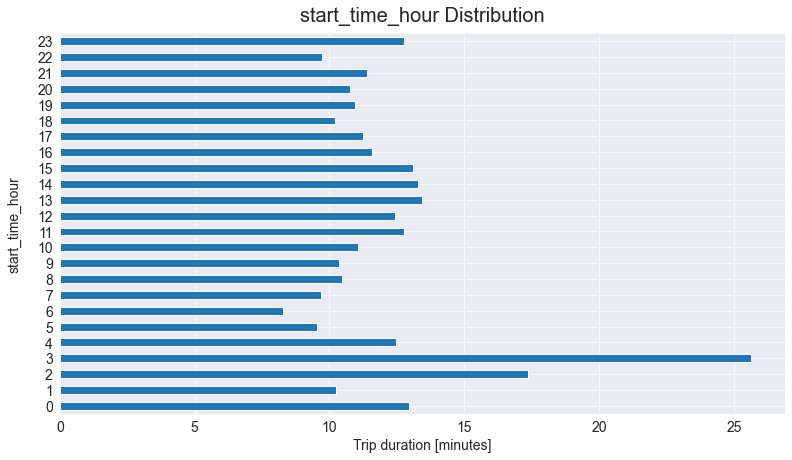

In [54]:
horizontal_bar_for_average_trip_duration(x='start_time_hour')

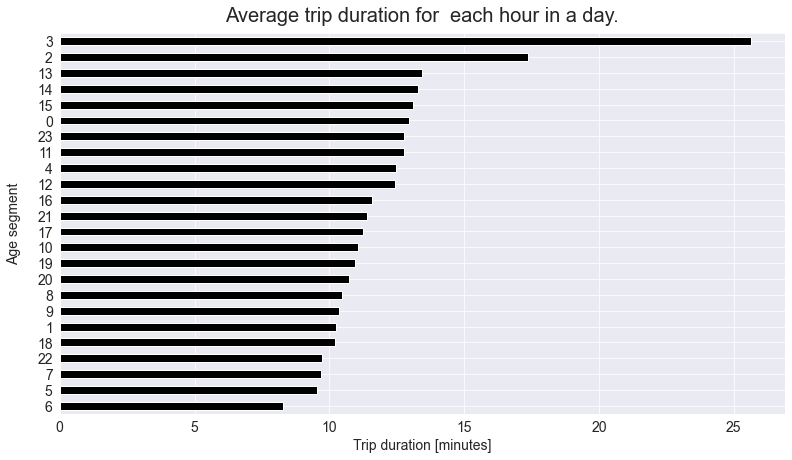

In [55]:
# stick with the black color while sorting our values.
colors=['black']
ax = bike_share.groupby('start_time_hour')['duration_mins'].mean().sort_values(ascending=True).plot(kind='barh', color=colors, figsize=(13,7))
ax.set_title('Average trip duration for  each hour in a day.', fontsize=20, y=1.015)
ax.set_ylabel('Age segment', labelpad=16)
ax.set_xlabel('Trip duration [minutes]');

<span style="color:navy"> 3 AM had the maximum average ride duration by more than 25 mins , then 2 Am came in the second place by 17 mins.

### Does being in `bike share for all trip` program affects your `duration trip` or not?

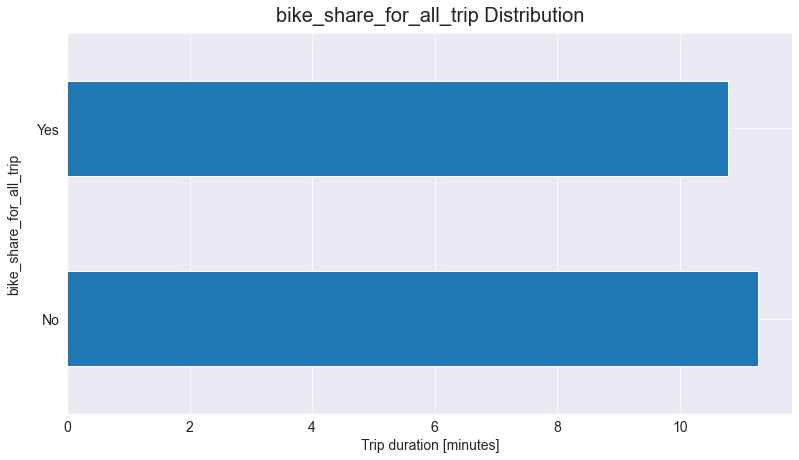

In [56]:
horizontal_bar_for_average_trip_duration(x='bike_share_for_all_trip')

<span style="color:navy"> We found that being in the program or not doesn't impact the ride duration because both of them almost had the same average.

### Which `Gender` is more in each `Client Type`?

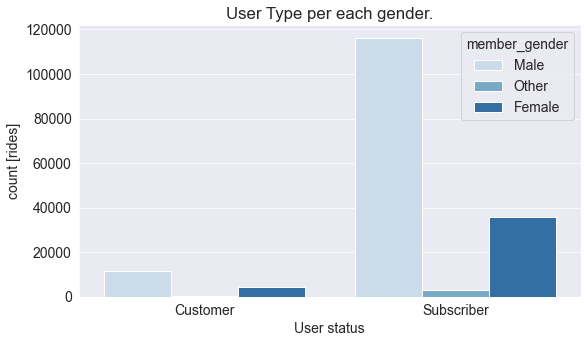

In [57]:
sb.countplot(data = bike_share, x = 'user_type', hue = 'member_gender', palette = 'Blues')
plt.xlabel('User status')
plt.title('User Type per each gender.')
plt.ylabel('count [rides]');

<span style="color:navy"> The vast majority of subscribers are men.

### What is the pattern that each `User Type` had throughout the the whole `weekdays`?

In [58]:
user_type_vs_weekday_df = bike_share.groupby(["start_time_weekday", "user_type"]).size().reset_index(name='count')

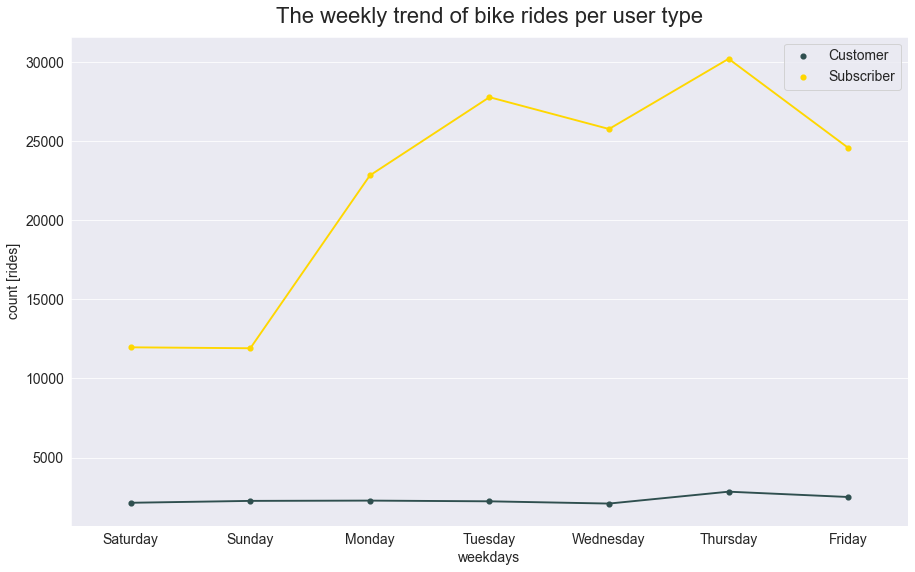

In [59]:
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'gold', 'Customer':'darkslategray'}
ax = sb.pointplot(x='start_time_weekday', y='count', hue='user_type', palette=my_palette, order=weekday_index,scale=.7, data=user_type_vs_weekday_df)
plt.title('The weekly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('weekdays')
plt.ylabel('count [rides]')
leg = ax.legend()

<span style="color:navy"> For subscriber people the most number of rides was done in Tuesday & Thursday, whereas for customer people the line is almost flat without any spikes.

### What is the pattern that each `User Type` had throughout the the whole `dayhours`?

In [60]:
user_type_vs_dayhours_df = bike_share.groupby(["start_time_hour", "user_type"]).size().reset_index(name='count')

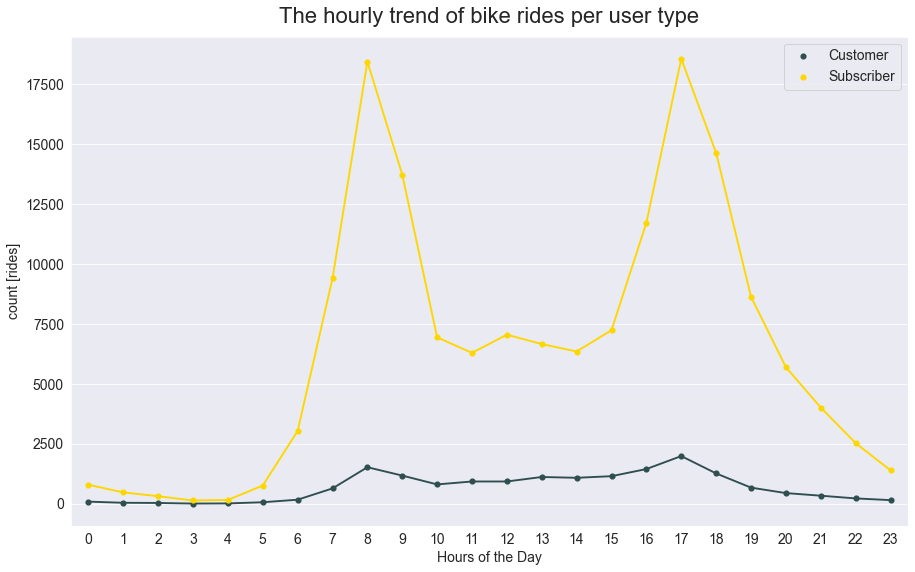

In [61]:
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'gold', 'Customer':'darkslategray'}
ax = sb.pointplot(x='start_time_hour', y='count', hue='user_type', palette=my_palette,scale=.7, data=user_type_vs_dayhours_df)
plt.title('The hourly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('Hours of the Day')
plt.ylabel('count [rides]')
leg = ax.legend()

<span style="color:navy"> It seems obvious now that subscribers use the bikes the most in the going to work at 8 AM and going home at 5 PM.

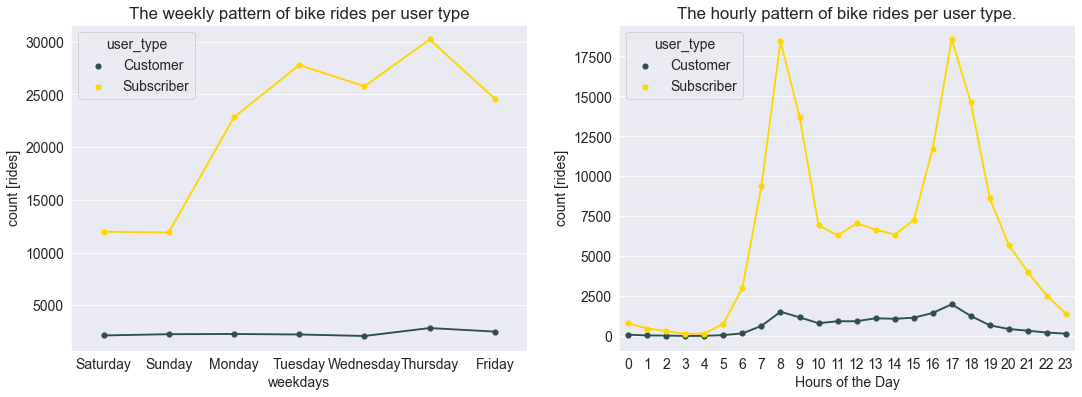

In [62]:
# two plot at a time.
fig, ax = plt.subplots(ncols = 2, figsize = [18,6])

# on the left
my_palette = {'Subscriber':'gold', 'Customer':'darkslategray'}
sb.pointplot(x='start_time_weekday', y='count', hue='user_type', 
             palette=my_palette, order=weekday_index,scale=.7,data=user_type_vs_weekday_df,ax = ax[0])
ax[0].set_title('The weekly pattern of bike rides per user type')
ax[0].set_ylabel('count [rides]')
ax[0].set_xlabel('weekdays')

# on the right
my_palette = {'Subscriber':'gold', 'Customer':'darkslategray'}
sb.pointplot(x='start_time_hour', y='count', hue='user_type',
             palette=my_palette,scale=.7, data=user_type_vs_dayhours_df,ax = ax[1])
ax[1].set_title('The hourly pattern of bike rides per user type.')
ax[1].set_ylabel('count [rides]')
ax[1].set_xlabel('Hours of the Day')

plt.show();

- We found that being in the program or not doesn't impact the ride duration because both of them almost had the same average.

- 3 AM had the maximum average ride duration by more than 25 mins , then 2 Am came in the second place by 17 mins.

- As we might expect the trip duration reached its peak in weekends by about 15mins.

- There is no significant difference or even fluctuations in average rides durations across all different age segments.

- The average amount of time spent for biking for men is slightly less than those for women. Previously, we knew that almost 75% of our data are men, which indicates that men is more determined with the period they'll spend in biking.

- As we can see here the average trip duration for Casual customers is more than those who had a subscription by about double the period.Thus,that may bring the idea that subscribers is using bikes for going to particular places like work or somethig like that dont take a lot of time.
***
- The vast majority of subscribers are men.
- For subscribers people the most number of rides was done in Tuesday & Thursday, whereas for customers people the line is almost flat without any spikes.
- It seems obvious now that subscribers use the bikes the most in the going to work at 8 AM and going home at 5 PM.

### What we are going to do next?
- Get the relationship between  `member age_segment` , `user type` & `duration_mins`.
- Get the relationship between  `member gender`  ,`user type` & `duration_mins`.

> ## Multivariate Exploration

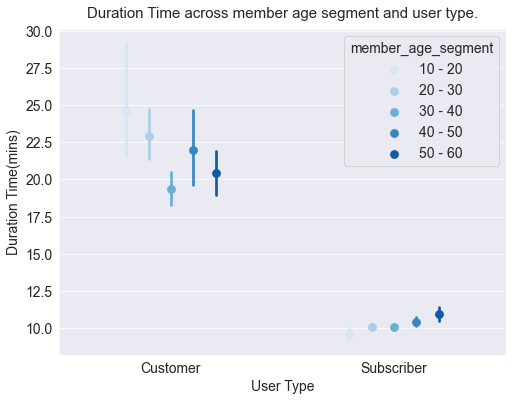

In [63]:
# plot
order= ['10 - 20','20 - 30','30 - 40','40 - 50','50 - 60']
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_share, x = 'user_type', y = 'duration_mins', hue = 'member_age_segment',hue_order=order
           ,palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xlabel('User Type')
plt.ylabel('Duration Time(mins)')
plt.title('Duration Time across member age segment and user type.', fontsize=15, y=1.015);

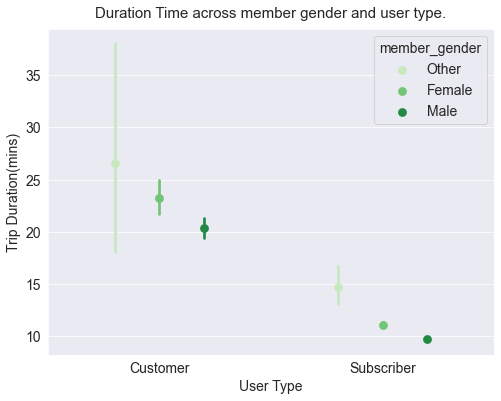

In [64]:
# plot
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_share, x = 'user_type', y = 'duration_mins', hue = 'member_gender',
                  hue_order=['Other','Female','Male'],palette = 'Greens', linestyles = '', dodge = 0.4)
plt.xlabel('User Type')
plt.ylabel('Trip Duration(mins)')
plt.title('Duration Time across member gender and user type.', fontsize=15, y=1.015);

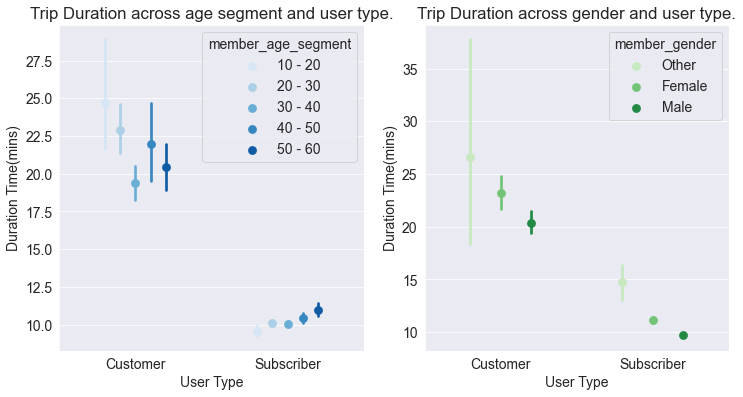

In [65]:
# two plot at a time.
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

# on the left
order= ['10 - 20','20 - 30','30 - 40','40 - 50','50 - 60']
sb.pointplot(data = bike_share, x = 'user_type', y = 'duration_mins', hue = 'member_age_segment',hue_order=order
           ,palette = 'Blues', linestyles = '', dodge = 0.4,ax = ax[0])
ax[0].set_title('Trip Duration across age segment and user type.')
ax[0].set_ylabel('Duration Time(mins)')
ax[0].set_xlabel('User Type')
ax[0].set_yticklabels([],minor = True)

# on the right
sb.pointplot(data = bike_share, x = 'user_type', y = 'duration_mins', hue = 'member_gender',
                  hue_order=['Other','Female','Male'],palette = 'Greens', linestyles = '', dodge = 0.4,ax = ax[1])
ax[1].set_title('Trip Duration across gender and user type.')
ax[1].set_ylabel('Duration Time(mins)')
ax[1].set_xlabel('User Type')
ax[1].set_yticklabels([],minor = True)

plt.show();

- For customers the younger segments of age have been consuming more time whereas for subscriber the eldest consumed more.
- It's way too clear from this figure that men uses bikes for a short period whether they were customers or subscriber.
***
- The unknown gender had the heighest averger trip duration for either Gender and User Type.